In [49]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import wave
import IPython.display as ipd

In [22]:
set_a = pd.read_csv('input/set_a.csv')
set_b = pd.read_csv('input/set_b.csv')
set_a_timing = pd.read_csv('input/set_a_timing.csv')
print(f"Shape a = {set_a.shape}")
print(f"Shape b = {set_b.shape}")
print(f"Shape a_timing = {set_a_timing.shape}")

Shape a = (176, 4)
Shape b = (656, 4)
Shape a_timing = (390, 4)


In [19]:
set_a.head()

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [20]:
set_b.head()

,dataset,fname,label,sublabel
0,b,set_b/Btraining_extrastole_127_1306764300147_C...,extrastole,NaN
1,b,set_b/Btraining_extrastole_128_1306344005749_A...,extrastole,NaN
2,b,set_b/Btraining_extrastole_130_1306347376079_D...,extrastole,NaN
3,b,set_b/Btraining_extrastole_134_1306428161797_C...,extrastole,NaN
4,b,set_b/Btraining_extrastole_138_1306762146980_B...,extrastole,NaN


In [21]:
set_a_timing.head()

,fname,cycle,sound,location
0,set_a/normal__201102081321.wav,1,S1,10021
1,set_a/normal__201102081321.wav,1,S2,20759
2,set_a/normal__201102081321.wav,2,S1,35075
3,set_a/normal__201102081321.wav,2,S2,47244
4,set_a/normal__201102081321.wav,3,S1,62992


# Concat set_a and set-b

In [37]:
train_ab = pd.concat([set_a, set_b])
train_ab.head()

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [32]:
train_ab.isnull().sum()

dataset       0
fname         0
label       247
sublabel    683
dtype: int64

## Column Label

In [28]:
train_ab.label.unique()

array(['artifact', 'extrahls', 'murmur', 'normal', nan, 'extrastole'],
      dtype=object)

In [38]:
train_ab.groupby(['label','dataset']).count()

fname  sublabel
label      dataset                 
artifact   a           40         0
extrahls   a           19         0
extrastole b           46         0
murmur     a           34         0
           b           95        29
normal     a           31         0
           b          320       120

Minimum samples per class : 19
Maximum samples per class : 351


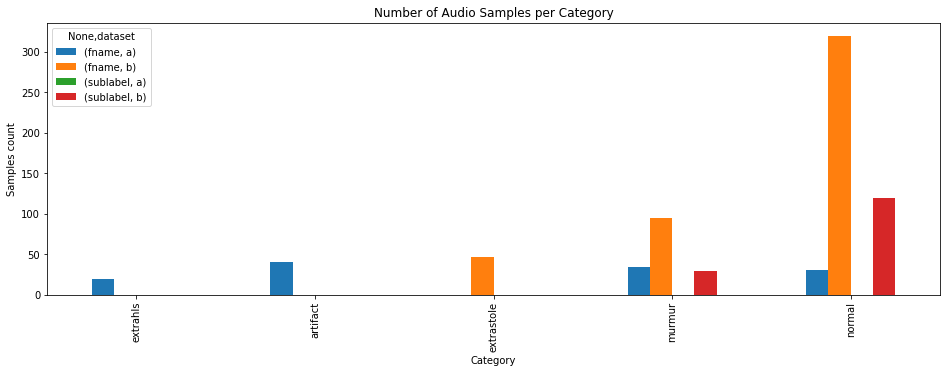

In [41]:
category_group = train_ab.groupby(['label','dataset']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
        .plot(kind='bar', stacked=False, title="Number of Audio Samples per Category", figsize=(16,5))

plot.set_xlabel('Category')
plot.set_ylabel('Samples count')

print("Minimum samples per class :", min(train_ab.label.value_counts()))
print("Maximum samples per class :",max(train_ab.label.value_counts()));

### Total amount of labeled samples

In [26]:
train_ab.label.value_counts()

normal        351
murmur        129
extrastole     46
artifact       40
extrahls       19
Name: label, dtype: int64

In [25]:
train_ab.label.value_counts().sum()

585

##### The are 585 samples of classified data. The rest in NaN, or unlabeled data.

### Normal beats

In [1]:
'''normal_file = 'input/set_a/normal__201105021654.wav'
ipd.Audio(normal_file)'''

"normal_file = 'input/set_a/normal__201105021654.wav'\nipd.Audio(normal_file)"

In [56]:
rate, signal = wavfile.read(normal_file)
print("Sampling Rate: ",rate)
print("Total samples: ",signal.shape[0])
print("Duration in:   ",signal.shape[0]/rate,"s")

Sampling Rate:  44100
Total samples:  352677
Duration in:    7.997210884353741 s


In [60]:
signal

array([ -49, -122, -240, ..., -365, -299, -172], dtype=int16)

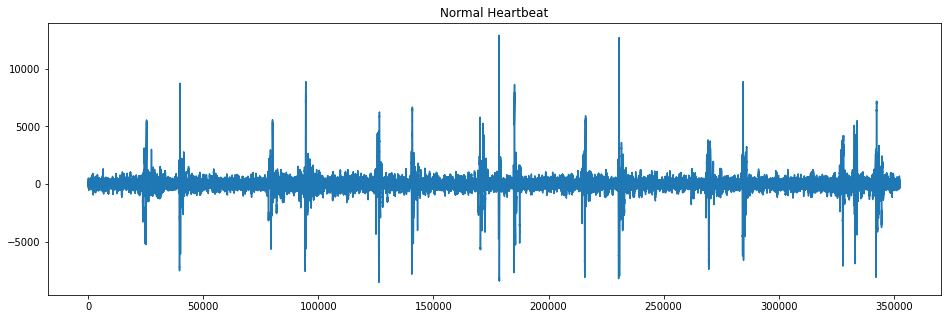

In [59]:
plt.figure(figsize=(16,5))
plt.plot(signal)
plt.title('Normal Heartbeat');

## Column sublabel

In [33]:
train_ab.sublabel.unique()

array([nan, 'noisymurmur', 'noisynormal'], dtype=object)

In [35]:
train_ab.sublabel.value_counts()

noisynormal    120
noisymurmur     29
Name: sublabel, dtype: int64